<a href="https://colab.research.google.com/github/Tannerbrodess/zillow_logistic_regression/blob/main/Zillow_Project_LogR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

Reading in data and performing some exploratory analysis

In [ ]:
df = pd.read_csv('/content/zillow_final.csv')

In [ ]:
df.columns

Index(['Address', 'City', 'State', 'Zip Code', 'Latitude', 'Longitude',
       'Number Of Bathrooms', 'Number of Bedrooms', 'Price',
       'Price Per Square Foot', 'Square Feet', 'Year Built', 'Sold'],
      dtype='object')

In [ ]:
df.head(5)

,Address,City,State,Zip Code,Latitude,Longitude,Number Of Bathrooms,Number of Bedrooms,Price,Price Per Square Foot,Square Feet,Year Built,Sold
0,3801 SW Pecan Cir,Bentonville,AR,72713,36.312013,-94.344779,3,4,523525,215,2435,2024,0
1,5303 SW Tea Olive Ln,Bentonville,AR,72713,36.335038,-94.273505,3,4,509425,205,2485,2024,0
2,1470 Sweetbriar Way,Centerton,AR,72719,36.348724,-94.306778,3,4,489950,182,2698,2017,0
3,1903 SE Clark St,Bentonville,AR,72712,36.353581,-94.190079,2,3,549900,300,1835,1978,0
4,5823 W Stoney Brook Rd,Rogers,AR,72758,36.317786,-94.197016,2,3,599000,259,2311,1996,0


In [ ]:
df.shape

(600, 13)

In [ ]:
df.describe()

,Zip Code,Latitude,Longitude,Number Of Bathrooms,Number of Bedrooms,Price,Price Per Square Foot,Square Feet,Year Built,Sold
count,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000
mean,72735.831667,36.268264,-94.177658,2.870000,3.611667,5.933675e+05,237.016667,2437.466667,1999.646667,0.500000
std,34.850024,0.091849,0.055370,1.105352,0.790721,5.874465e+05,141.166402,1169.145011,21.909858,0.500417
min,72113.000000,35.991870,-94.344779,1.000000,1.000000,1.800000e+05,95.000000,600.000000,1885.000000,0.000000
25%,72712.000000,36.223904,-94.210842,2.000000,3.000000,3.550000e+05,185.000000,1745.000000,1989.000000,0.000000
50%,72745.000000,36.289639,-94.172014,3.000000,4.000000,4.462575e+05,205.000000,2200.500000,2004.500000,0.500000
75%,72758.000000,36.335134,-94.137719,3.000000,4.000000,5.960000e+05,228.250000,2826.500000,2017.000000,1.000000
max,72764.000000,36.402014,-94.049108,10.000000,7.000000,5.855000e+06,1763.000000,10004.000000,2024.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Address                600 non-null    object 
 1   City                   600 non-null    object 
 2   State                  600 non-null    object 
 3   Zip Code               600 non-null    int64  
 4   Latitude               600 non-null    float64
 5   Longitude              600 non-null    float64
 6   Number Of Bathrooms    600 non-null    int64  
 7   Number of Bedrooms     600 non-null    int64  
 8   Price                  600 non-null    int64  
 9   Price Per Square Foot  600 non-null    int64  
 10  Square Feet            600 non-null    int64  
 11  Year Built             600 non-null    int64  
 12  Sold                   600 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 61.1+ KB


<Axes: xlabel='City', ylabel='Sold'>

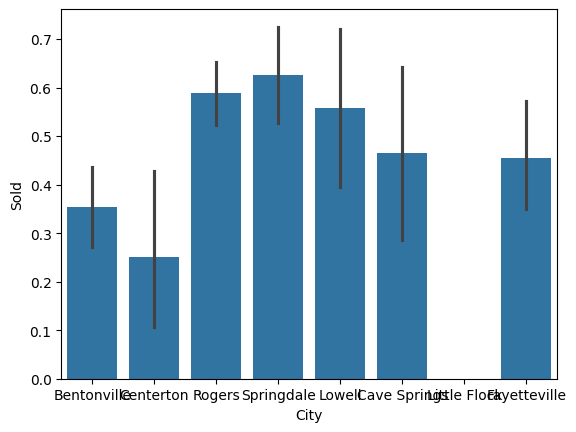

In [ ]:
sns.barplot(x='City', y='Sold', data=df)

In [ ]:
grouped_data_0 = df.loc[df['Sold'] == 0].groupby('City').size()
grouped_data_1 = df.loc[df['Sold'] == 1].groupby('City').size()


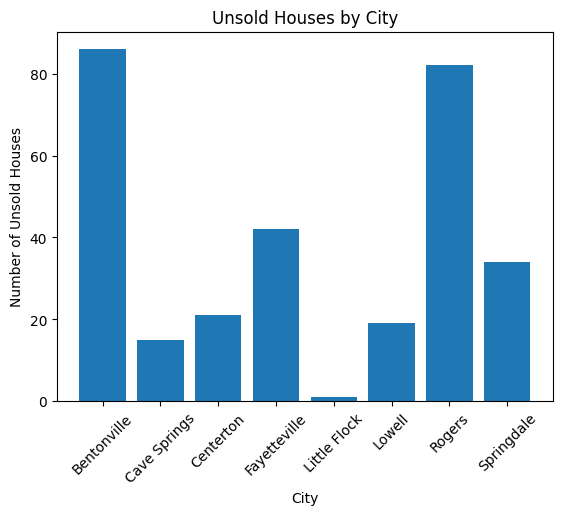

In [ ]:
plt.bar(grouped_data_0.index, grouped_data_0.values)
plt.xlabel("City")
plt.ylabel("Number of Unsold Houses")
plt.title("Unsold Houses by City")
angle = 45
plt.xticks(rotation=angle)
plt.show()

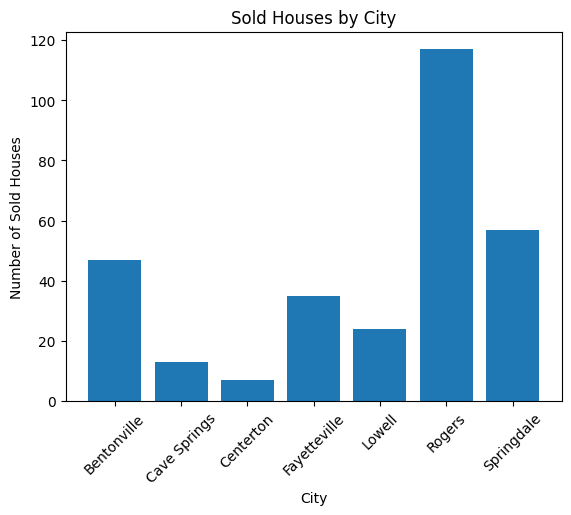

In [ ]:
plt.bar(grouped_data_1.index, grouped_data_1.values)
plt.xlabel("City")
plt.ylabel("Number of Sold Houses")
plt.title("Sold Houses by City")
angle = 45
plt.xticks(rotation=angle)
plt.show()

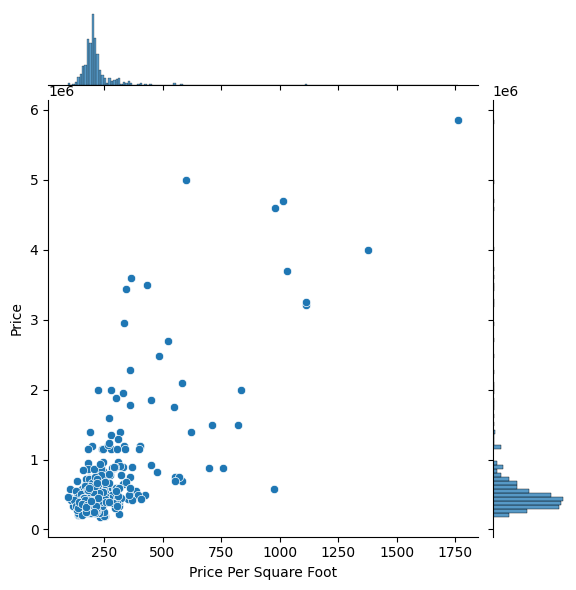

In [ ]:
sns.jointplot(x='Price Per Square Foot', y='Price', data=df)

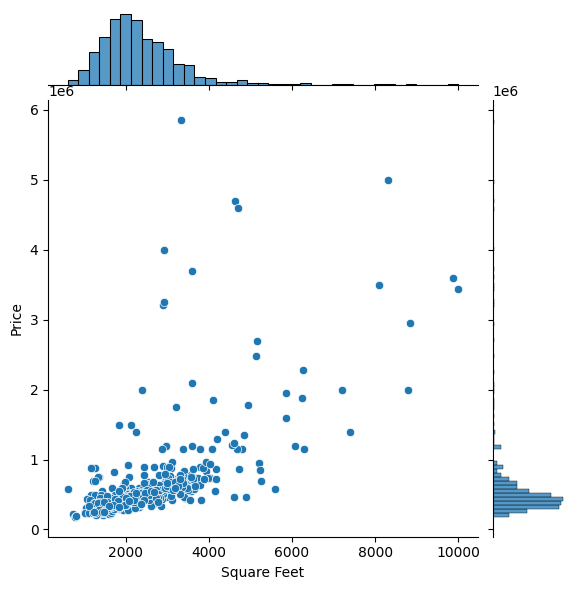

In [ ]:
sns.jointplot(x='Square Feet', y='Price', data=df)

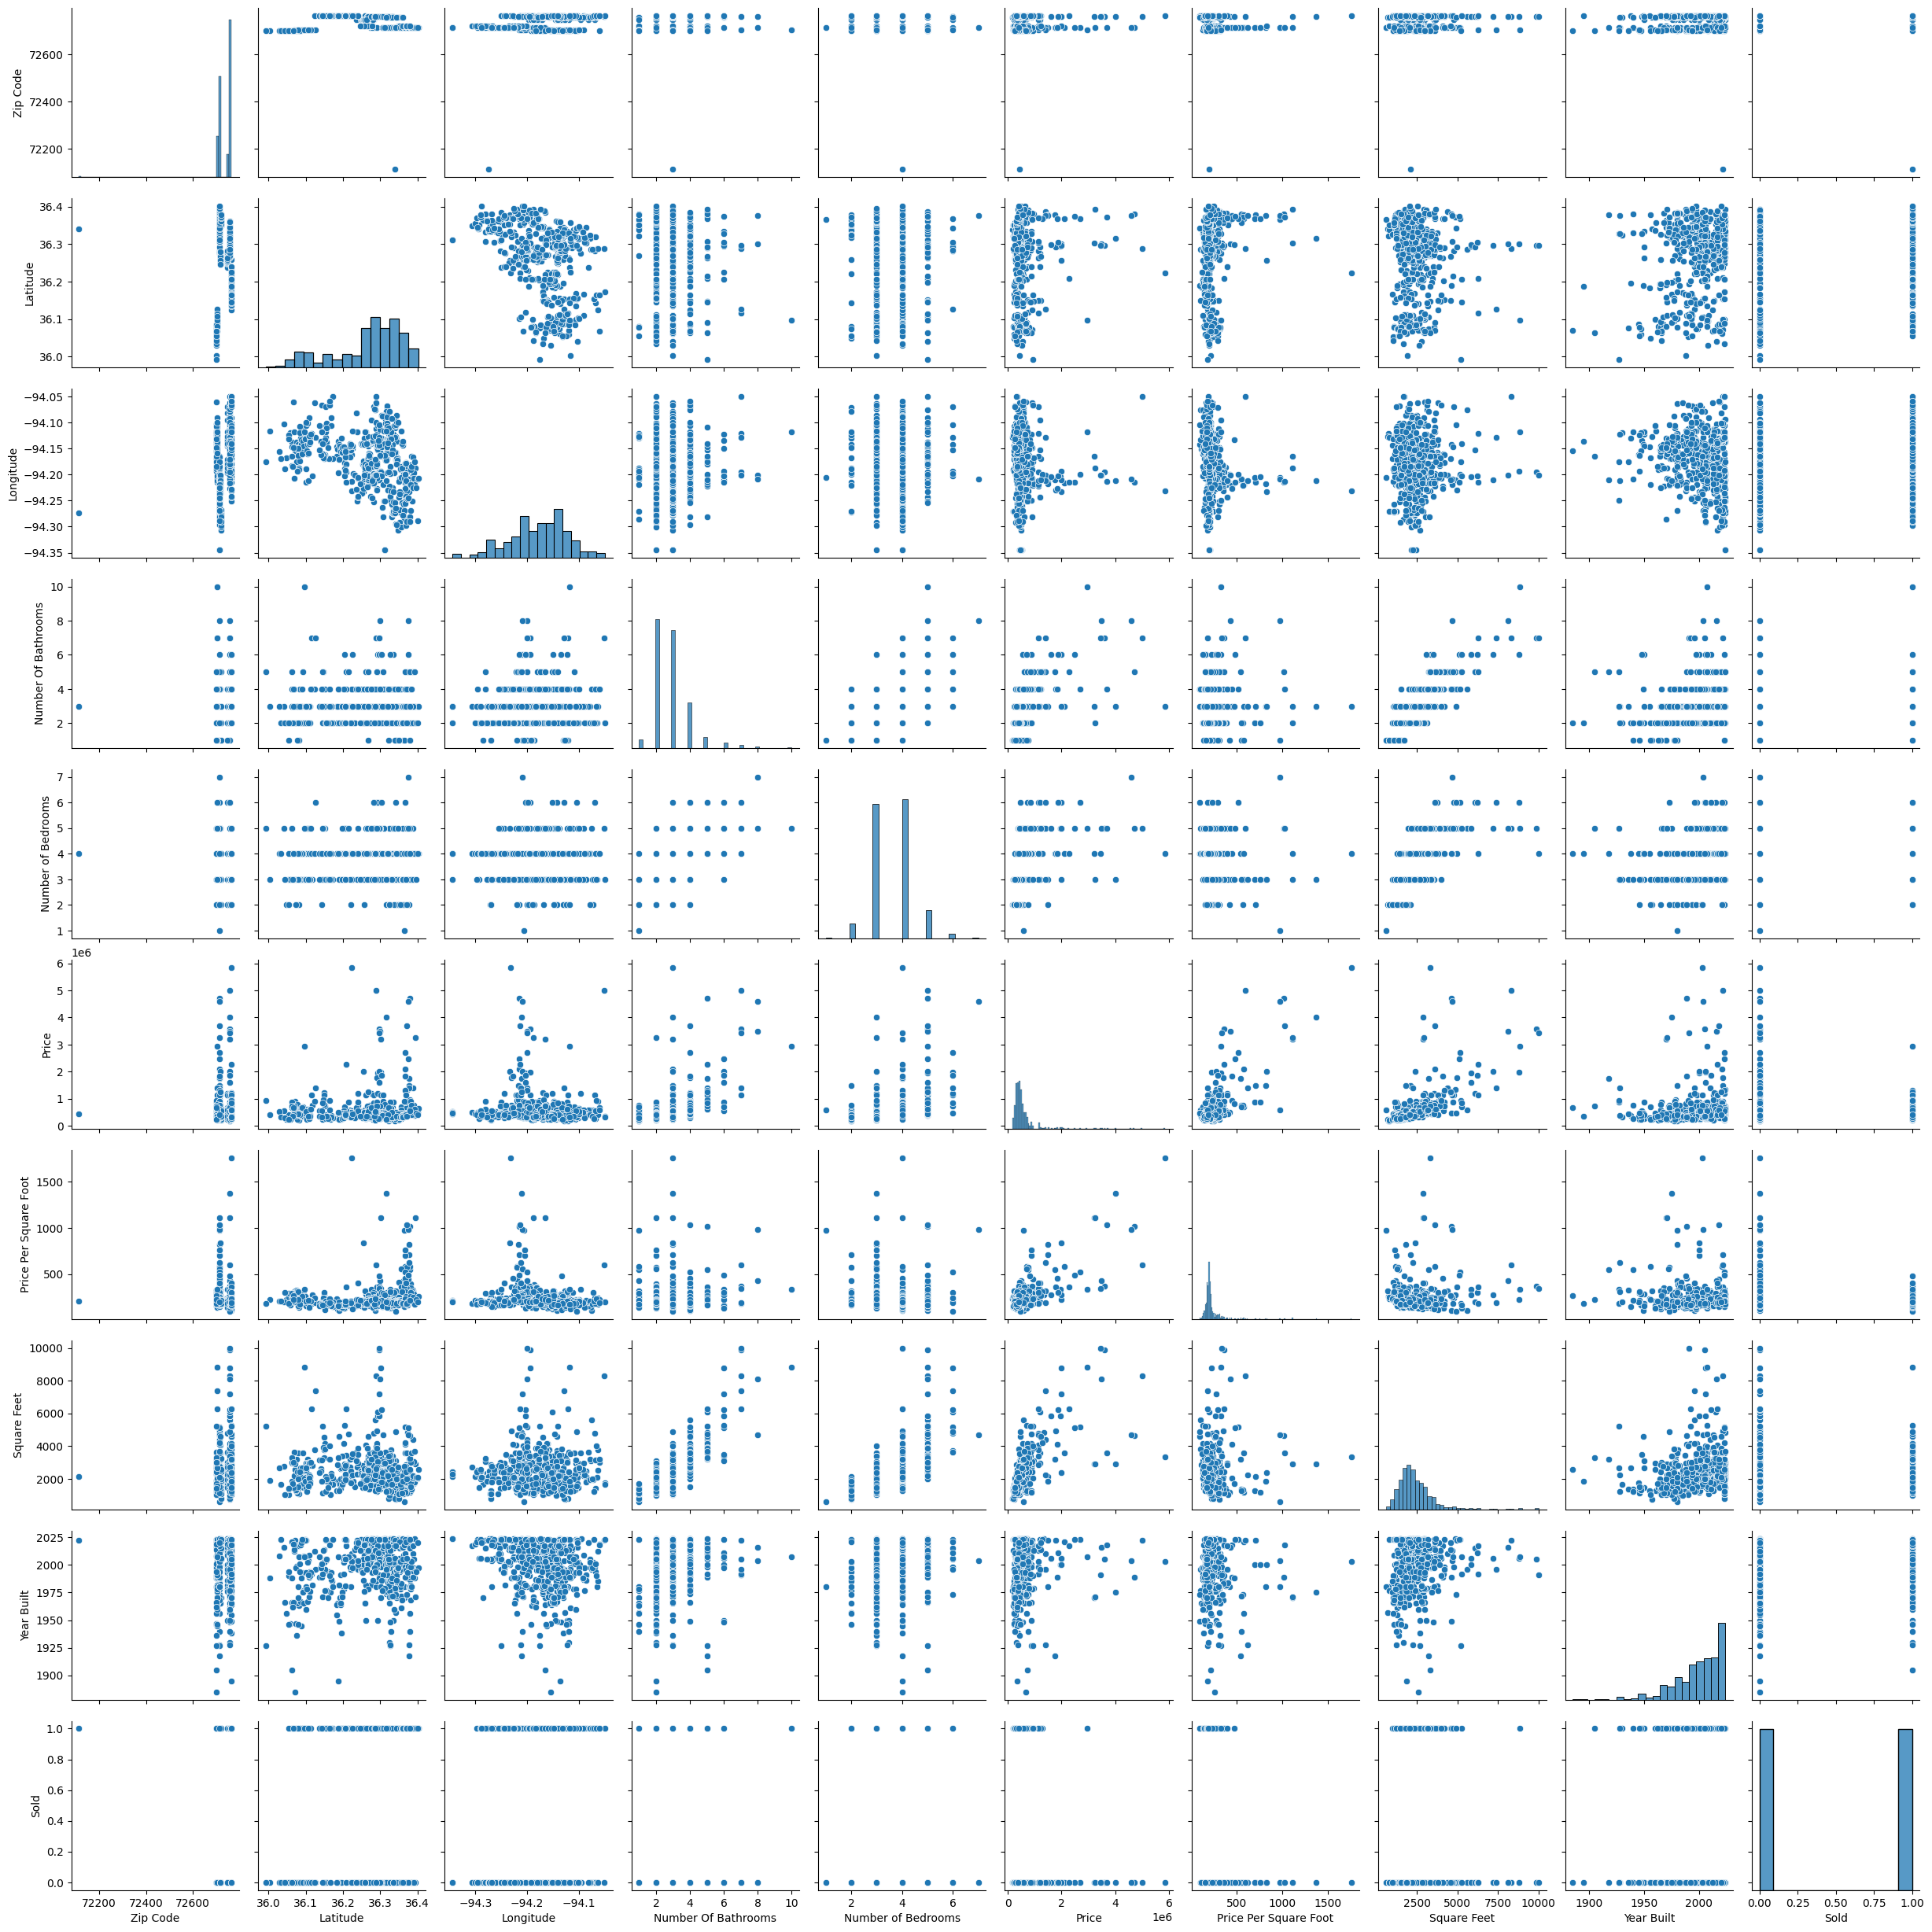

In [ ]:
sns.pairplot(df)

<ipython-input-21-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

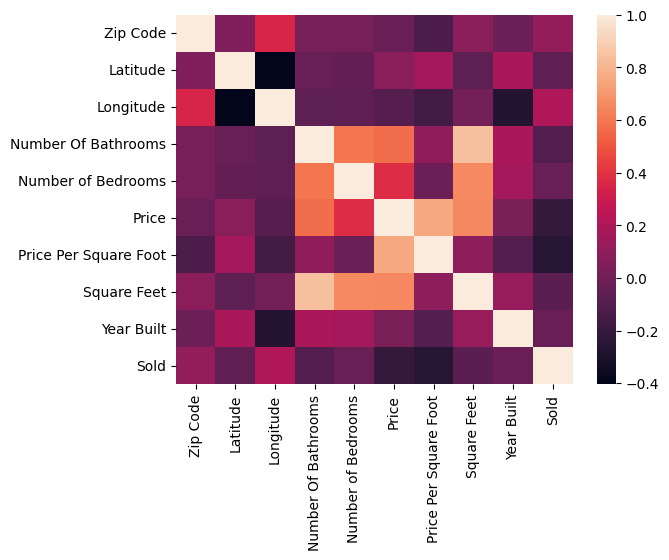

In [ ]:
sns.heatmap(df.corr())

<Axes: xlabel='Latitude', ylabel='Longitude'>

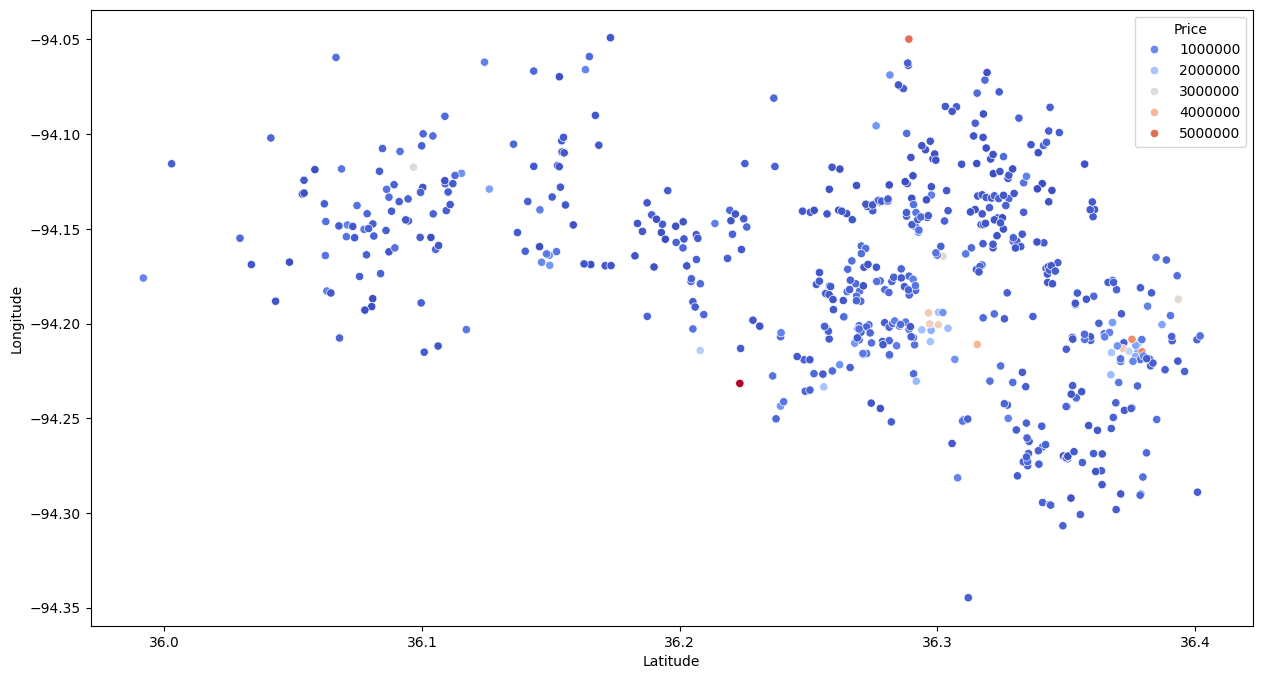

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue='Price', palette='coolwarm')

<Axes: xlabel='Latitude', ylabel='Longitude'>

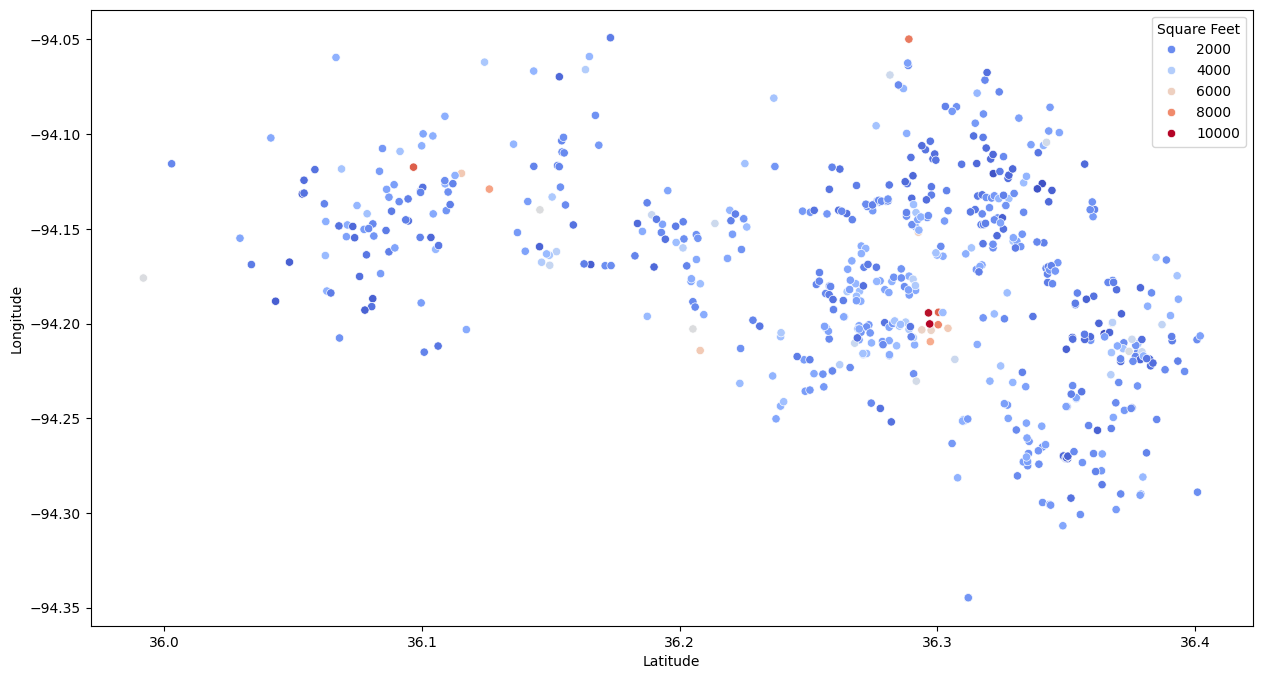

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='Latitude', y='Longitude', hue='Square Feet', palette='coolwarm')

In [ ]:
df['Square Feet Per Room'] = df['Square Feet'] / df['Number of Bedrooms']

In [ ]:
df['Dollar Per Room'] = df['Price'] / df['Number of Bedrooms']

In [ ]:
df.head(5)

,Address,City,State,Zip Code,Latitude,Longitude,Number Of Bathrooms,Number of Bedrooms,Price,Price Per Square Foot,Square Feet,Year Built,Sold,Square Feet Per Room,Dollar Per Room
0,3801 SW Pecan Cir,Bentonville,AR,72713,36.312013,-94.344779,3,4,523525,215,2435,2024,0,608.750000,130881.250000
1,5303 SW Tea Olive Ln,Bentonville,AR,72713,36.335038,-94.273505,3,4,509425,205,2485,2024,0,621.250000,127356.250000
2,1470 Sweetbriar Way,Centerton,AR,72719,36.348724,-94.306778,3,4,489950,182,2698,2017,0,674.500000,122487.500000
3,1903 SE Clark St,Bentonville,AR,72712,36.353581,-94.190079,2,3,549900,300,1835,1978,0,611.666667,183300.000000
4,5823 W Stoney Brook Rd,Rogers,AR,72758,36.317786,-94.197016,2,3,599000,259,2311,1996,0,770.333333,199666.666667


In [ ]:
df.corr()

<ipython-input-27-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Zip Code,Latitude,Longitude,Number Of Bathrooms,Number of Bedrooms,Price,Price Per Square Foot,Square Feet,Year Built,Sold,Square Feet Per Room,Dollar Per Room
Zip Code,1.000000,0.049708,0.351628,0.020450,0.019979,-0.021474,-0.119412,0.079172,-0.015759,0.112145,0.095725,-0.037929
Latitude,0.049708,1.000000,-0.404203,-0.028779,-0.043372,0.081850,0.168276,-0.059826,0.190803,-0.058144,-0.057527,0.103596
Longitude,0.351628,-0.404203,1.000000,-0.063661,-0.057802,-0.088641,-0.156806,0.009502,-0.268606,0.200347,0.054869,-0.092220
Number Of Bathrooms,0.020450,-0.028779,-0.063661,1.000000,0.595388,0.569142,0.103815,0.835921,0.189530,-0.105635,0.706292,0.404765
Number of Bedrooms,0.019979,-0.043372,-0.057802,0.595388,1.000000,0.378327,-0.018233,0.656672,0.171398,-0.027424,0.236623,0.108441
Price,-0.021474,0.081850,-0.088641,0.569142,0.378327,1.000000,0.757115,0.654278,0.037739,-0.210321,0.588003,0.930623
Price Per Square Foot,-0.119412,0.168276,-0.156806,0.103815,-0.018233,0.757115,1.000000,0.095015,-0.094948,-0.259532,0.121789,0.862559
Square Feet,0.079172,-0.059826,0.009502,0.835921,0.656672,0.654278,0.095015,1.000000,0.123735,-0.072878,0.869064,0.488034
Year Built,-0.015759,0.190803,-0.268606,0.189530,0.171398,0.037739,-0.094948,0.123735,1.000000,-0.020556,0.070030,-0.020482
Sold,0.112145,-0.058144,0.200347,-0.105635,-0.027424,-0.210321,-0.259532,-0.072878,-0.020556,1.000000,-0.057351,-0.226367


<ipython-input-28-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

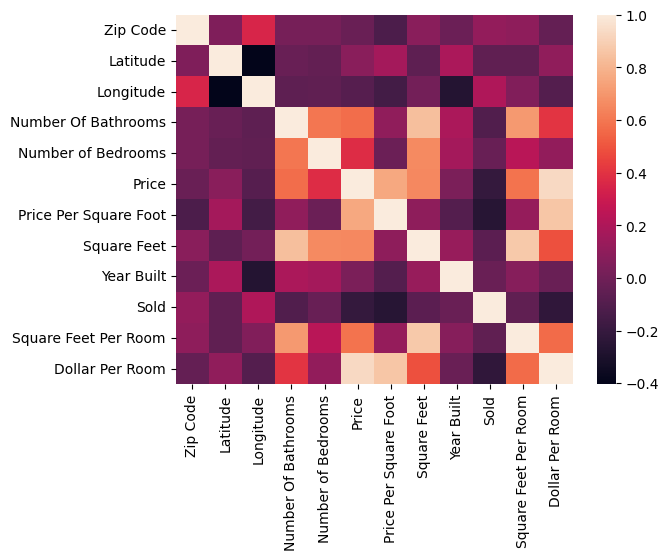

In [ ]:
sns.heatmap(df.corr())

From initial analysis, it appears that location has the biggest impact on whether the house was sold. However, the biggest impacts on price are in order:


1.   Price per square foot
2.   Square feet
3.   Number of bathrooms
4.   Number of bedrooms



**Clean**

In [ ]:
df = pd.get_dummies(data=df, columns=['City'], drop_first=True)


In [ ]:
df = pd.get_dummies(data=df, columns=['Zip Code'], drop_first=True)


In [ ]:
df = df.drop('State', axis=1)

In [ ]:
df.shape

(600, 31)

In [ ]:
df = df.drop(['Address', 'Longitude', 'Latitude' ], axis=1)


In [ ]:
df.head(5)

,Number Of Bathrooms,Number of Bedrooms,Price,Price Per Square Foot,Square Feet,Year Built,Sold,Square Feet Per Room,Dollar Per Room,City_Cave Springs,...,Zip Code_72704,Zip Code_72712,Zip Code_72713,Zip Code_72718,Zip Code_72719,Zip Code_72745,Zip Code_72756,Zip Code_72758,Zip Code_72762,Zip Code_72764
0,3,4,523525,215,2435,2024,0,608.750000,130881.250000,0,...,0,0,1,0,0,0,0,0,0,0
1,3,4,509425,205,2485,2024,0,621.250000,127356.250000,0,...,0,0,1,0,0,0,0,0,0,0
2,3,4,489950,182,2698,2017,0,674.500000,122487.500000,0,...,0,0,0,0,1,0,0,0,0,0
3,2,3,549900,300,1835,1978,0,611.666667,183300.000000,0,...,0,1,0,0,0,0,0,0,0,0
4,2,3,599000,259,2311,1996,0,770.333333,199666.666667,0,...,0,0,0,0,0,0,0,1,0,0


**Logistic Regression**

In [ ]:
X = df.drop('Sold', axis=1)
y = df['Sold']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lm = LogisticRegression()

In [ ]:
lm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
predictions = lm.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.65      0.40      0.50       107
           1       0.52      0.75      0.61        91

    accuracy                           0.56       198
   macro avg       0.58      0.57      0.55       198
weighted avg       0.59      0.56      0.55       198



In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[43 64]
 [23 68]]


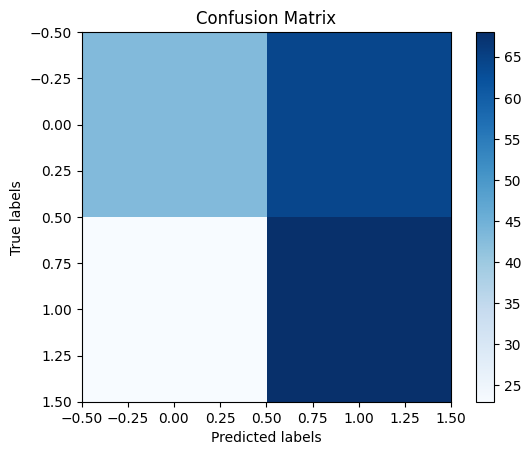

In [ ]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

**Min Max Scaler Data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
all_min_max = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)


In [ ]:
all_min_max.head()

,Number Of Bathrooms,Number of Bedrooms,Price,Price Per Square Foot,Square Feet,Year Built,Square Feet Per Room,Dollar Per Room,City_Cave Springs,City_Centerton,...,Zip Code_72704,Zip Code_72712,Zip Code_72713,Zip Code_72718,Zip Code_72719,Zip Code_72745,Zip Code_72756,Zip Code_72758,Zip Code_72762,Zip Code_72764
0,0.142857,0.333333,0.030114,0.070755,0.113994,0.719424,0.108001,0.036066,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.142857,0.333333,0.026272,0.036164,0.154190,0.683453,0.165825,0.031213,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.142857,0.333333,0.035306,0.044025,0.168439,0.791367,0.186324,0.042623,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.142857,0.333333,0.637591,0.792453,0.247023,0.618705,0.299373,0.803279,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.285714,0.500000,0.063888,0.083333,0.183433,1.000000,0.118977,0.046745,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
log_r = LogisticRegression()
log_r.fit(all_min_max, y_train)

LogisticRegression()

In [ ]:
all_min_max_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)


In [ ]:
predictions = lm.predict(all_min_max_test)

In [ ]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.4696969696969697
MSE: 0.4696969696969697
RMSE: 0.6853444168423419


In [ ]:
sns.distplot((y_test-predictions),bins=50);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.13      0.23       107
           1       0.49      1.00      0.66        91

    accuracy                           0.53       198
   macro avg       0.75      0.57      0.45       198
weighted avg       0.77      0.53      0.43       198



In [ ]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[14 93]
 [ 0 91]]


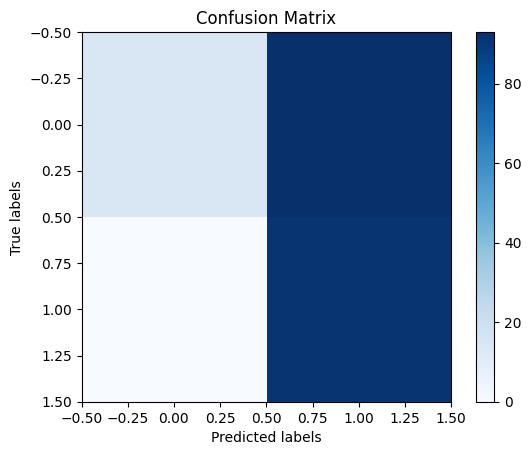

In [ ]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()

**Standard Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)

In [ ]:
lm = LogisticRegression()
lm.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
all_ss_test = pd.DataFrame(scaler.fit_transform(X_test), columns=X_test.columns)


In [ ]:
predictions = lm.predict(all_ss_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.49      0.60       107
           1       0.58      0.84      0.68        91

    accuracy                           0.65       198
   macro avg       0.68      0.66      0.64       198
weighted avg       0.69      0.65      0.64       198



In [ ]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[52 55]
 [15 76]]


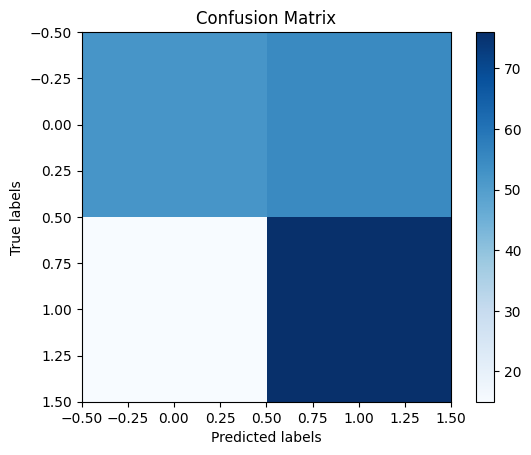

In [ ]:
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.colorbar()
plt.show()